# Integration and Summation

## Indefinite Integrals

(As usual, this should look familiar)

$\int(1+ 2y - 3y^{2})dy$

In [1]:
%pylab inline
import sympy

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Create the function
y = sympy.Symbol('y')
func = 1 + 2 * y -3*y**2
sympy.integrate(func, y)

-y**3 + y**2 + y

Looks pretty good: $-y^{3} + y{2} + y$

Now a plot, so that it is possible to see what the function looks like.

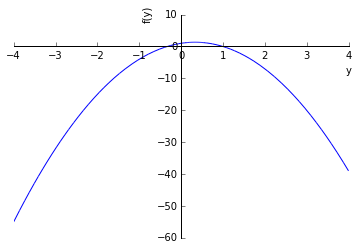

In [3]:
sympy.plotting.plot(func, (y, -4, 4))

## Definite Integrals
Sympy does not, out of the box support definite integrals.  A bit of googling turned up a work around.

(Again familiar)

$\int_{-1}^{1}(x^{2} -2)dx$

In [5]:
x = sympy.Symbol('x')
func = x ** 2 - 2
indef = sympy.Integral(func)
to_be_integrated, (free_var,) = indef.args
print to_be_integrated  #What is the function we are working with?
print free_var #What is the variable(s) we are working with?
definite = sympy.Integral(to_be_integrated, (free_var, -1, 1))
print 'The definite integral is {}'.format(definite.evalf()) #Evaluate the integral

x**2 - 2
x
The definite integral is -3.33333333333333


Note that the above can fail (well not the above example, but a more complex example) because of how the underlying code is working.  Just a heads up that plugging in a different function or different bounds can cause issues.

## Summation
Python makes summations quite easy.  Here is a GIScience example - mean nearest neighbor distance.  

$\bar{d}_{min} = \frac{\sum_{i=1}^{n} d_{min}(s_{i})}{n}$

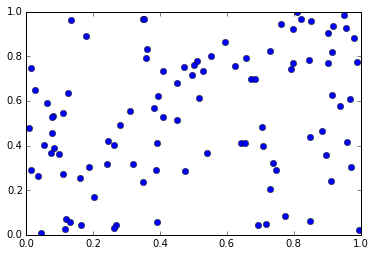

In [6]:
#lets cook some data
pts = np.random.random((100,2))
plot(pts.T[0], pts.T[1], 'o')

In [7]:
import math
#We will use euclidean distance (and a brute force implementation)
nearest = []
for i, row in enumerate(pts):
    closest = float(inf)  #Set an infinitely large closest
    for j, other_row in enumerate(pts):
        if i == j: #Check for self neighbor (distance will always be zero)
            continue
        #Euclidean distance
        distance = math.sqrt((row[0] - other_row[0])**2 + (row[1] - other_row[1])**2)

        #Is the newly computed distance the closest point?
        if distance < closest:
            closest = distance
            
    nearest.append(closest)

Now we have $d_{min} \forall n$, or all the minimum distances for all observations.  So we just need the average. 

In [8]:
#Summation
total = 0
for i in nearest:
    total += i
print 'The sum is {}'.format(total)
n = len(nearest)
print 'Mean nearest neighbor is {}'.format(total / n)

The sum is 5.03256744084
Mean nearest neighbor is 0.0503256744084


In [9]:
#We can do this more easily:
mean_nearest = sum(nearest) / float(n)  #Make sure n is a float so we get float division
print mean_nearest

0.0503256744084


Now we can start looking for those points wich might deviate from the mean.  This is now into the GIScience domain.